In [624]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [625]:
data = pd.read_csv("IMDB-Movie-Data.csv")
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [626]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [627]:
print('Number of Rows: ',data.shape[0])
print('Number of columns: ',data.shape[1])

Number of Rows:  1000
Number of columns:  12


In [628]:
# To gatting the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [629]:
# check missing values in dataset
print("Any missing value?",data.isnull().values.any())
data.isnull().sum()

Any missing value? True


Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [630]:
# Drop all missing values
data.dropna(axis=0)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [631]:
# check for duplicate data
dup_data = data.duplicated().any()
print("Are there any duplicated value:",dup_data)

# remove the duplicate value
data = data.drop_duplicates()
data

Are there any duplicated value: False


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [632]:
# show overall statical about dataframe
data.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A stuffy businessman finds himself trapped ins...,Ridley Scott,"Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese ...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


In [633]:
# display title of the Movie Having Runtime >= 180 Minutes
data.columns
data[data['Runtime (Minutes)'] >= 180]['Title']


82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

In [634]:
# Highest Average voting in year

votes_mean = data.groupby('Year')['Votes'].mean()
# sort the data in ascending order
votes_mean.sort_values(ascending=False)


Year
2012    285226.093750
2008    275505.384615
2006    269289.954545
2009    255780.647059
2010    252782.316667
2007    244331.037736
2011    240790.301587
2013    219049.648352
2014    203930.224490
2015    115726.220472
2016     48591.754209
Name: Votes, dtype: float64

Text(0, 0.5, 'Votes')

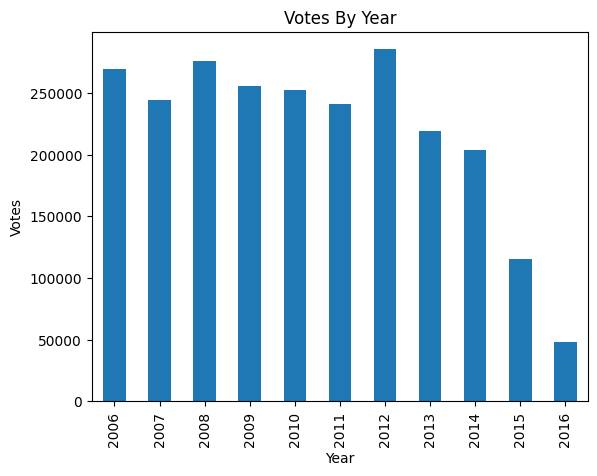

In [647]:
votes_mean.plot(kind='bar')
plt.title("Votes By Year")
plt.ylabel('Votes')


In [636]:
# higest average revenue in year
revenue_mean = data.groupby('Year')["Revenue (Millions)"].mean()
revenue_mean.sort_values(ascending=False)


Year
2009    112.601277
2012    107.973281
2010    105.081579
2008     99.082745
2007     87.882245
2011     87.612258
2013     87.121818
2006     86.296667
2014     85.078723
2015     78.355044
2016     54.690976
Name: Revenue (Millions), dtype: float64

Text(0, 0.5, 'Revenue (Millions)')

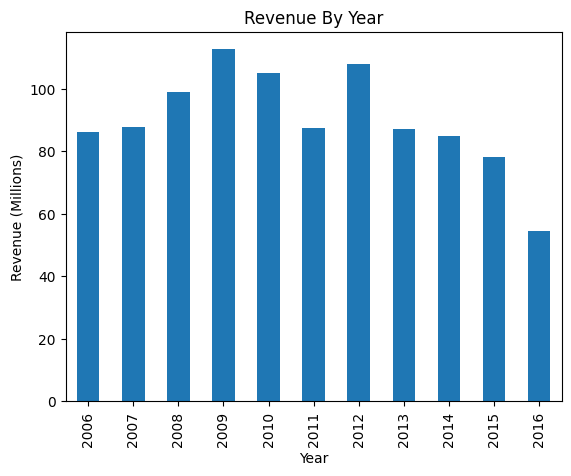

In [645]:
revenue_mean.plot(kind='bar')
plt.title("Revenue By Year")
plt.ylabel('Revenue (Millions)')

In [638]:
# Average rating for each director

director_mean = data.groupby("Director")['Rating'].mean()
director_mean.sort_values(ascending=False)

Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Olivier Nakache      8.60
Makoto Shinkai       8.60
Aamir Khan           8.50
                     ... 
Micheal Bafaro       3.50
Jonathan Holbrook    3.20
James Wong           2.70
Shawn Burkett        2.70
Jason Friedberg      1.90
Name: Rating, Length: 644, dtype: float64

In [639]:
# top 10 lengthy movies title an Runtime
top10_len = data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']]
top10_len.set_index('Title')

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


Text(0, 0.5, 'Title')

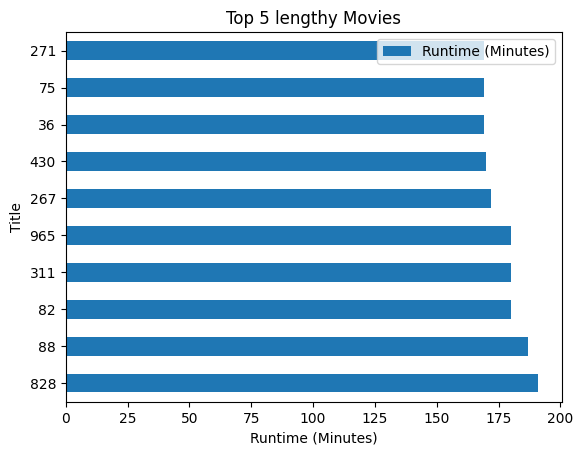

In [644]:
# sns.barplot(top10_len['Runtime (Minutes)'],y=top10_len.index)

# plt.show()
top10_len.plot(kind='barh')
plt.title("Top 5 lengthy Movies")
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Title')

Text(0.5, 1.0, 'Number of Movies per year')

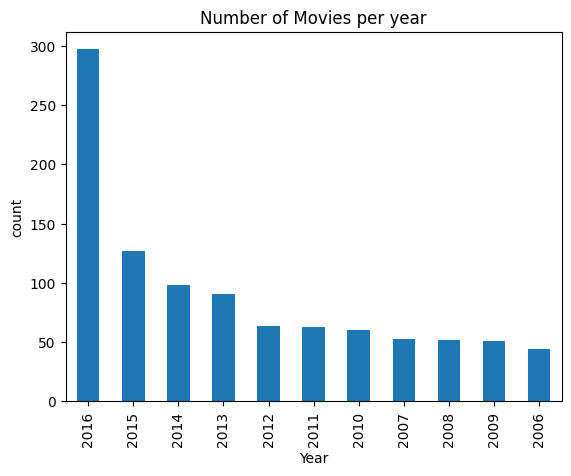

In [ ]:
# Display no of movies per year
movies_count = data['Year'].value_counts()
movies_count.plot(kind='bar')
plt.ylabel("count")

# sns.countplot(x='Year',data=data)
plt.title('Number of Movies per year')

In [ ]:
# Most popular Movie Title (Higest Revenue)
Revenue_max = data[data['Revenue (Millions)'].max() == data['Revenue (Millions)']]['Title']
print(Revenue_max)

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object


In [ ]:
# Display Top 10 Highest Rated Movie Title and its Director
top10_Rating = data.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')

top10_Rating

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Dangal,8.8,Nitesh Tiwari
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan


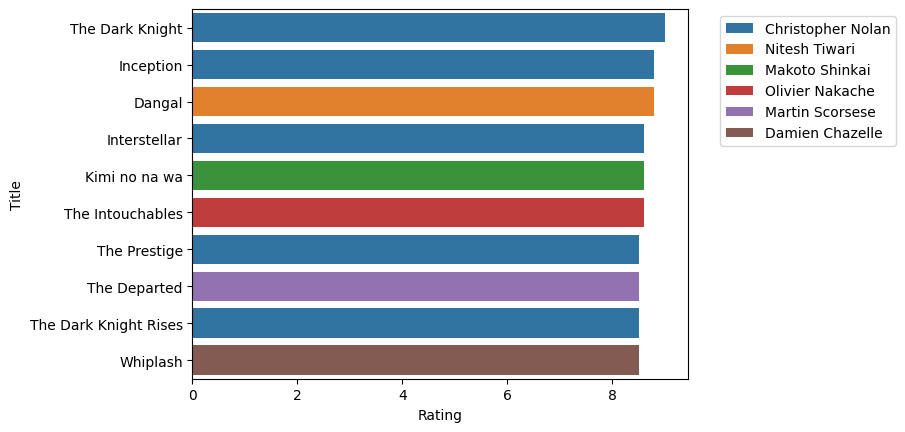

In [ ]:
# top10_Rating.plot(kind='barh',)
# plt.ylabel('Title')
# plt.xlabel('Rating')
sns.barplot(x='Rating',y=top10_Rating.index,data=top10_Rating,hue='Director',dodge=False)
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [ ]:
# top 10 highest Revenue Movie Titles
top10_Revenue = data.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']].set_index('Title')
top10_Revenue

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


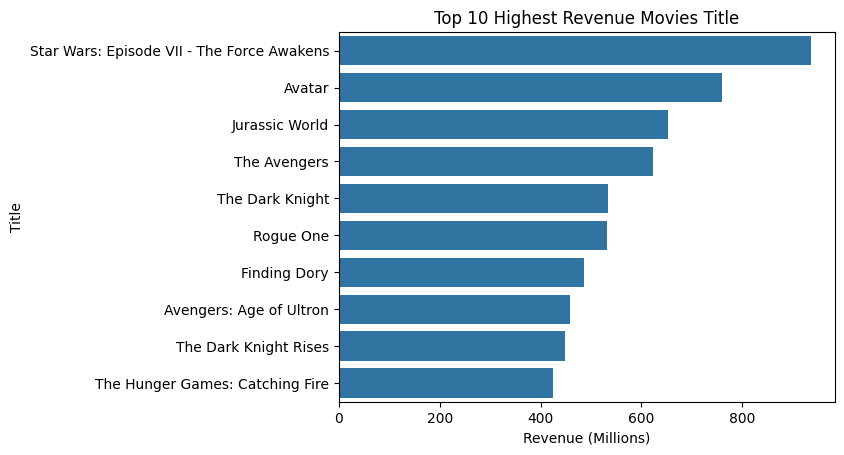

In [ ]:
sns.barplot(x='Revenue (Millions)',y=top10_Revenue.index,data=top10_Revenue)
plt.title("Top 10 Highest Revenue Movies Title")
plt.show()

In [ ]:
# Find Average Rating of Movies year wise
avg_Rating = data.groupby('Year')['Rating'].mean().sort_values(ascending=False)
avg_Rating

Year
2007    7.133962
2006    7.125000
2009    6.960784
2012    6.925000
2011    6.838095
2014    6.837755
2010    6.826667
2013    6.812088
2008    6.784615
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

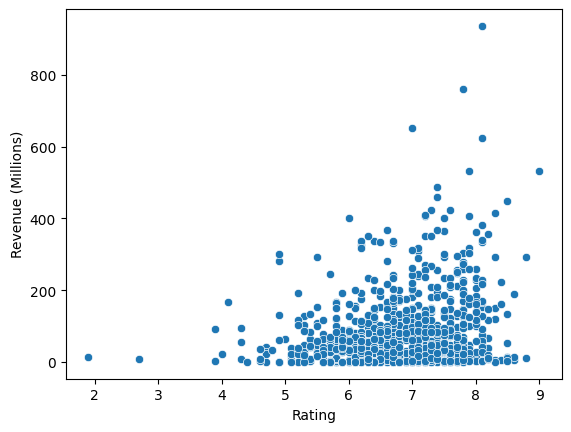

In [ ]:
# Does Rating Affect the Revenue(yes)
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=data)

In [ ]:
# classify Movies Based on Ratings
def rating(rating):
    if rating>=7.0:
        return "Excellent"
    elif rating>=6.0:
        return "Good"
    else:
        return "Average"

data['rating_cat'] = data['Rating'].apply(rating)
data.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,rating_cat
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


In [ ]:
# count no of Action Movie
Count_Action_Movies = len(data[data['Genre'].str.contains('Action')])
print("Total Action Movies is:",Count_Action_Movies)

Total Action Movies is: 303


In [ ]:
# Find Unique value From Genre
Unique_value = data['Genre']

list1=[]
for value in data['Genre']:
    list1.append(value.split(','))
# list1

# 2D list is converted into 1D list
one_D = []
for item in list1:
    for item1 in item:
        one_D.append(item1)

# one_D

# now find unique value
uni_list=[]
for item in one_D:
    if item not in uni_list:
        uni_list.append(item)

print("Unique value in Genre:",)  
(uni_list)      

Unique value in Genre:


['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']

In [ ]:
# How many Films of Each Genre Were Made
one_D = []
for item in list1:
    for item1 in item:
        one_D.append(item1)

from collections import Counter
Counter(one_D)       

Counter({'Drama': 513,
         'Action': 303,
         'Comedy': 279,
         'Adventure': 259,
         'Thriller': 195,
         'Crime': 150,
         'Romance': 141,
         'Sci-Fi': 120,
         'Horror': 119,
         'Mystery': 106,
         'Fantasy': 101,
         'Biography': 81,
         'Family': 51,
         'Animation': 49,
         'History': 29,
         'Sport': 18,
         'Music': 16,
         'War': 13,
         'Western': 7,
         'Musical': 5})